In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [10]:
#DataFrame manipulation
data = pd.read_csv("data/modified_train.csv")
data = data.set_index("id")
data = data.sort_values("id")
data.head()

,cuisine,ingredients,all_ingredients
id,,,
0,spanish,"['mussels', 'ground black pepper', 'garlic clo...",mussels;ground black pepper;garlic cloves;saff...
1,mexican,"['tomatoes', 'diced red onions', 'paprika', 's...",tomatoes;diced red onions;paprika;salt;corn to...
2,french,"['chicken broth', 'truffles', 'pimentos', 'gre...",chicken broth;truffles;pimentos;green pepper;o...
3,chinese,"['fresh ginger', 'sesame oil', 'frozen peas', ...",fresh ginger;sesame oil;frozen peas;cooked ric...
4,italian,"['orange peel', 'cookies', 'vanilla ice cream'...",orange peel;cookies;vanilla ice cream;gran mar...


In [12]:
#Convert CSV to matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data['all_ingredients'].values)
X.shape

#This essentially does one-hot-encoding for each ingredient as a column having 1 or 0 for each row being a dish

(39774, 3051)

In [13]:
#Encoding the labels
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(data.cuisine)

In [14]:
y[:100]

array([17, 13,  5,  3,  9,  3,  5, 16,  3,  9, 13,  7, 13,  9, 18, 13, 16,
       13, 13,  2, 10, 13, 11, 13,  6, 13, 16, 13, 15, 13,  5,  8, 16,  7,
        7, 16,  7,  2, 18, 13,  9, 17, 13, 13, 18,  9, 14,  2,  9,  8, 11,
       17,  9,  5,  9,  3,  7, 13,  9, 13, 12, 16,  9,  7, 16,  6, 14,  4,
       16, 13, 16,  6, 10, 15,  5, 16,  9,  9, 11, 13, 13,  5,  4, 16,  3,
        5,  3, 19, 16, 12, 17, 13, 16,  9, 13,  5,  5, 13,  9,  9])

In [15]:
#LabelEncoder converts strings to numbers
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [18]:
#Training a Logistic Regression on the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
logistic.score(X_test, y_test)

0.7844123192960403

Text(0.5, 62.474999999999966, 'Predicted label')

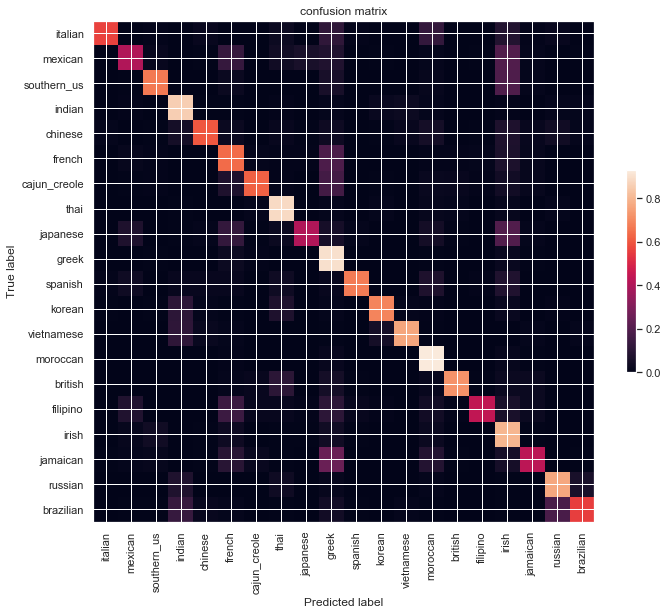

In [21]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = data['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

from sklearn.metrics import classification_report
y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cuisines))

In [31]:
def predict_cuisine(ingredients):
    X_test = cv.transform(ingredients.values)
    result = logistic.predict(X_test)
    result = enc.inverse_transform(result)
    print(result)

In [42]:
predict_cuisine(pd.Series(["soy sauce; mirin"]))

['japanese']
